# Shepard Convolutional Neural Networks
Eyad Alshami

## Abstract
Existing deep learning approaches such as convolutional neural networks and sparse auto-encoders are based on translation invariant operators, which can limit the performance if the task requires translation variant interpolation (TVI).
This labbook presents my implementation of the Shepard Convolution Neural Network (ShCNN), which is designed to realize end-to-end trainable TVI operators in the network. The paper shows that by adding only a few
feature maps in the new Shepard layers, the network is able to achieve stronger results than a much deeper architecture.
<br>The labbook explores the proposed Shepard Interpolation layer and the effect of adding more Shepard Interpolation layers to a network on performance.

## 1. Introduction
Lately, a lot of research focus on applying deep learning methods in low-level vision as well as image processing tasks such as image super-resolution, image denoising, and image inpainting. In this labbook we will focus on the problem of **image inpainting**, which is the process of filling in missing or damaged pixels in an image using a fraction of the original image. This can be related to the problem of **interpolation** which is a technique for filling in the gaps in a set of data points using the known values of the other points. It is often used to estimate values that are not known, such as points on a graph between known points. The two problems are related to each other in the sense that the missing pixel values are interpolated from the known pixels values.

There are a lot of attempts to use deep learning to solve this problem. however, the building blocks of the Deep learning models used are inherently translation invariant. **Translation invariance (TI)**, which is one of the most important features of Convolutional Neural Networks (CNNs), means that when the input shifts the output also shifts but stays otherwise unchanged, in other words the network can recognize an object as an object, even when its appearance shifts in the image *[Figure 1](#Translation_invariance)*. This feature is due to **parameter sharing** where we apply the same filter/kernel all over the image to produce one feature map. Therefore, the filters/kernels will produce the same response at the location of the object, whenever it is in the image *[Figure 2](#Parameter_sharing)*.
Although this is a very important feature, it prevents the network from performing **Translation Variant** operations such as image inpainting, in which the network will be sensetive to the location and translation of the object in the image.

<a id="Translation_invariance"></a>
<div>
<center><img src="images/translation%20invariance.png"/></center>
<center><b>Figure 1</b>: <i>An image shows how the network can recognize an object as an object, even when its appearance shifts in the image.</i></center>
</div>


<a id="Parameter_sharing"></a>
<div>
<center><img src="images/parameter_sharing.gif"/></center>
<center><p><b>Figure 2</b>: <i>Applying the same filter all over tha image to produce one feature map.</i></p></center>
</div>

To see why image inpainting is translation variant operation, we can consider [Figure 3](#inpainting_tv). Where we have an image with missing area represented by the black region, and we can see by taking four patches of the image, that the missing pixels distribute differently in each patch. The <code>red</code> dot represtes the ancor point which we want to get a value for by applying the kernel. One can see that for each patch the most sensible kernel to be used with it is different than the other kernels. This shows that image inpainting cannot be simply modeled by applying a single kernel due to the inherent spatially varying property. Therefore, it is less optimal to use the traditional convolutional neural network and parameter sharing to do translation variant operation.

<br><br>
<center><div id="inpainting_tv"><img src="images\conv_are_not_translation_variant.png" width="500"/><p> <b>Figure 3</b>: <i>Illustration of translation variant interpolation. (a) The application of inpainting. The black regions
indicate the missing part. (b) Four selected patches. The bottom row shows the kernels for interpolating the
central pixel of each patch.</i></p></div>
</center>

### 1.1 Related Work

With the rapid use of deep learning in the area of low-level computer vision in 2014, a lot of research has incorporated deep learning techniques and architectures to solve the problem of image inpainting. The simplest approach by [Burger et al.](#Bibliography) was to use a simple multi-layer neural network to learn the mapping between noisy and clear images. In [David Eigen et al.](#Bibliography) they tackled the problem of removing rain drops and dirt in an image using a Convolutional Neural Network (CNN) with three layers, which represents the ability of CNN to blindly handle translation variant problems in real-world problems. The first attempt to use CNNs to do image inpainting failed to beat the state-of-the-art super-resolution systems.



Although deep CNNs managed to blindly handle TV problems, the authors of "Shepard Convolutional Neural Network" focused on designing a deep neural network **layer** that can perform translation variant operations in a more simple and efficient way without the need to use too deep NNs, which could be an essential step for a wide range of low-level vision problems.

### 1.2 Analysis:

Deep learning approaches can generate reasonable results for tasks requiring translation variant properties but are not always the best option due to their complexity. The main focus of the authors was to design simple and high-efficient architectures that can be easily implemented and trained.
<br>They experimented with different architectures, one of them was a network with three convolutional layers trained with ***one million*** synthetic corrupted/clear image pairs. The results can be seen in [Figure 4](#related_word_results), which contained residues of the corruption, text corruption, in them.<br> By adding more layers and training multiple models, the deepest one was 8 layers deep, they found that although they experienced slight improvements, the residues remained.
<br>The sensible next step was trying to explicitly inform the network about the position of the missing pixels. This was done by passing the mask that indicated the missing pixels to the network as an extra channel in the input image. The results showed slight improvements but were still worse than using the 8-layers network.

<center><div id="related_word_results"><img src="images\related_work_analysis.jpg"/><p><b>Figure 4</b><i>: Input images (Left). Results from a regular CNN (Mid). Results from a regular CNN trained with masks (right).</i></p></div></center>

### 1.3 Organisation of the Write-Up

In [section 2](#2.-Theory) we start with some basic background knowledge on the problem and the methodology that the Shepard layer is based on, then in [Section 3](#3.-Practice:-Implementation-and-Experiments) we introduce the network architecture and the implementation and shows some experiments where I tried to increase the depth of the network and see the effect of adding more ShConv layers on the performance.
Finally, the labbook concludes with a comparison of the performance of the network on different datasets.

## 2. Theory


### 2.1 Shepard Interpolation or Inverse Distance Weighted interpolation:
The intuition when dealing with interpolation problems like image inpainting is that pixels' values tend to distribute similarly in a small neighborhood, and this similarity diminishes with distance. In other words, to generate a value for a missing pixel, we can weigh pixels depending on their distance from the unknown one, close pixels have a bigger weight and farther pixels have a smaller weight. So the closer a pixel is to the unknown one, the higher its weight is and vice versa.

The Shepard Interpolation or Inverse distance weighting (IDW) model is exactly that intuition, which is a type of deterministic method for multivariate interpolation with a known scattered set of points. The assigned values to unknown points are calculated with an average of the values available at the known points weighted by their inverse distances to the unknown point. The next formula defines Shepard interpolation model:
<br><br>

$$u(x)=\left\{\begin{matrix}
\frac{\sum_{i=1}^{N}w_i(x)u_i)}{\sum_{i=1}^{N}w_i(x))} & if \;d(x, x_i)\neq 0 \;for\;all\;i\\ 
u_i & if \;d(x, x_i)=  0 \;for\;some\;i
\end{matrix}\right.\\ \\ where \\ \\ w_i(x)=\frac{1}{d(x, x_i)^p}$$

<br><br>

### 2.2 Shepard Interpolation Demonstration:

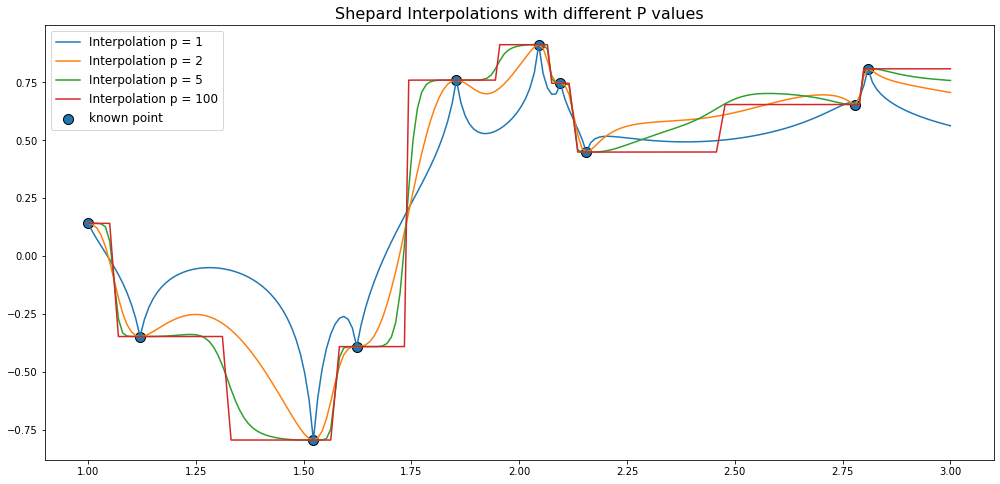

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
import random
import matplotlib.pyplot as plt
# for windows
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def get_value(x, xs, ys, p=4):
    if (np.any(np.isclose(xs, x))):
        return f(x)
    else:
        dists = [distance.euclidean(x, x_)**(-p) for x_ in xs]
        numerator = [y*w for y,w in zip(ys, dists)]
        return sum(numerator) / sum(dists)

def f(x):
    return np.sin(x**2+(2*x))

x = np.linspace(1, 3, 200)  # Sample data.
y = f(x)
fig, ax = plt.subplots(figsize=(17, 8))
# ax.set_xlabel('x label')
# ax.set_ylabel('y label')
ax.set_title("Shepard Interpolations with different P values", size=16)
inter_values = np.zeros_like(x)
m = 10
inter_is = random.sample(list(range(len(x))), m)
inter_is.sort()
deformed_xs = x[inter_is]
inter_values[inter_is] = x[inter_is]
deformed_ys = f(deformed_xs)

for p in [1, 2, 5, 100]:
    for i, x_ in enumerate(x):
        inter_values[i] = get_value(x_, deformed_xs, deformed_ys, p)
    ax.plot(x, inter_values, label=f'Interpolation p = {p}')

ax.scatter(deformed_xs, deformed_ys, s=100, facecolor='C0', edgecolor='k', label="known point")
ax.legend(prop={'size': 12})

### 2.3 Shepard Interpolation layer:
The authers leveraged the Shepard interpolation framework to design a neural network architecture for translation variant interpolation tasks. The Shepard interpolation can be written in a convolutional form as:
<br><br>
$$J_p=\left\{\begin{matrix}
(K \ast I)_p / (k \ast M)_p& if\;M_p=0 \\ I_p 
 & if\; M_p=1
\end{matrix}\right.$$

<br><br>
Where $I$ and $J$ are the input and output images, respectively. $p$ indexes the image coordinates. $M$ is the binary indicator, $M_p=0$ indicates unkown pixel value, $M_p=1$ indicates known pixel value. $K$ is the kernel with its weights inversely proportional to the distance between the unknown pixel and the known pixel.
<br><br>

To break down the above formula, $(K\ast I)_p$ represents the ordinary convolution of the kernel with the input image, and $(K\ast M)_p$ represents the convolution of the kernel with the mask that represents the missing pixels. The most important things to note here are, firsr, **the same kernel** is used for both convolutions, and secondly, the element-wise division of the outputs of the convolutions controls the way how pixel information is propagated across the regions. This gives the network the capability to handel interpolation for irrigularly-spaced data and make it translation variant.

<br><br>
<a id='Equation_1'></a>
$$F^n_i(F^{n-1}, M^n)=\sigma (\sum_{j}\frac{K^m_{ij} \ast F^{n-1}_j}{K^n_{ij} \ast M^n_j} \; + \; b^n), \; n=1,2,3,\cdots $$
<center><font color='green'>Equation 1</font></center>


<br><br>

wher $n$ is the index of layers. The subscript $i$ in $F_i^n$ is the index of feature maps in the layer $n$. The subscript $j$ in $K^m_{ij}$ is the index of the feature maps in the layer $n-1$. where $M^n$ is the mask of the current layer. $F^{n-1}$ represents all the feature maps in the layer $n-1$. $K_{ij}$ is the kernel of the current layer. $b^n$ is the bias of the current layer.

$F^{n-1}$ could be the feature maps of regular layers in a CNN or a pooling layer. It could also be the output of the previous Shepard interpolation layer. Thus we can stack Shepard interpolation layers on top of each other to form a highly nonlinear interpolation operator.

The input mask used is a binary map of valueone for the known area, zero for the misiin area. And the mask for layer $n+1$ can be automatically generated by the reault of previous convolved mask $K^n \ast M^n$, by zeroing out insignificant values and thresholding it.

<div class="alert alert-block alert-info">Although the paper did not specify or mention any details about the zeroing and thresholding steps,
I found those two steps are essential for the performance of the network, and to get resonable resutls. Besides that the paper mentioned that for inpainting and relativly large missing areas will benefit more from multi-stage Shepard interpolation layer with nonlinearity. They did not provide any details about how they perform the multi-stage shepard interpolation.
</div>


## 3. Practice: Implementation and Experiments

<div class="alert alert-block alert-danger">
For the experiment and training to work, the following packages must be installed
</div>



In [1]:
!pip install torch
!pip install torchvision
!pip install wandb
!pip install pytorch_lightning



<div class="alert alert-block alert-info">
For reproducibility, we set the random seed of the libraries used to a specific value.
</div>


In [1]:
import torch
import random
import numpy as np
from configs import seed

# fix the seed for reproducibility
seed = seed
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

### 3.1 A Peak into the Training Data

In the paper the authors used **one million** training images without any information about the source or the content of those images. Due to the limited resources, I only used the flicker thumbnail dataset because it has repititive patterns (facial features), and it is easier to see the output results on them.

The Thumbnails128x128 part of the Flickr-Faces-HQ Dataset can be downloaded from here: Please __[download it](https://drive.google.com/open?id=1tg-Ur7d4vk1T8Bn0pPpUSQPxlPGBlGfv)__ and place it in the same folder as this jupyter notebook beside other code files. The downloaded dataset will be nested in *70* folders, each folder will contain *1000* images of size 128x128 *(70,000 images in total)*.

To construct the synthetic corruption, I used two methods, the first is 1 rectangular cutout, the second is random text overlay. In the paper they did not show the performance of the model on large missing areas of the image, they only showed the output on text corrupted images. To study the performance of the model on large missing areas I chose the maximum side length of the cutout to be 50 pixels which is big enough to see output, and the text size to be 15. *important note is that the generated cutouts are not centered on the image, but randomly placed on the image.* The text overlay method used random text generated from the *mit-words.txt* file can be downloaded __[here](https://www.mit.edu/~ecprice/wordlist.10000)__, and the fonts are choosen randomly from the available fonts in the system.

Next we will take a peek into the two types of datasets used in the training.

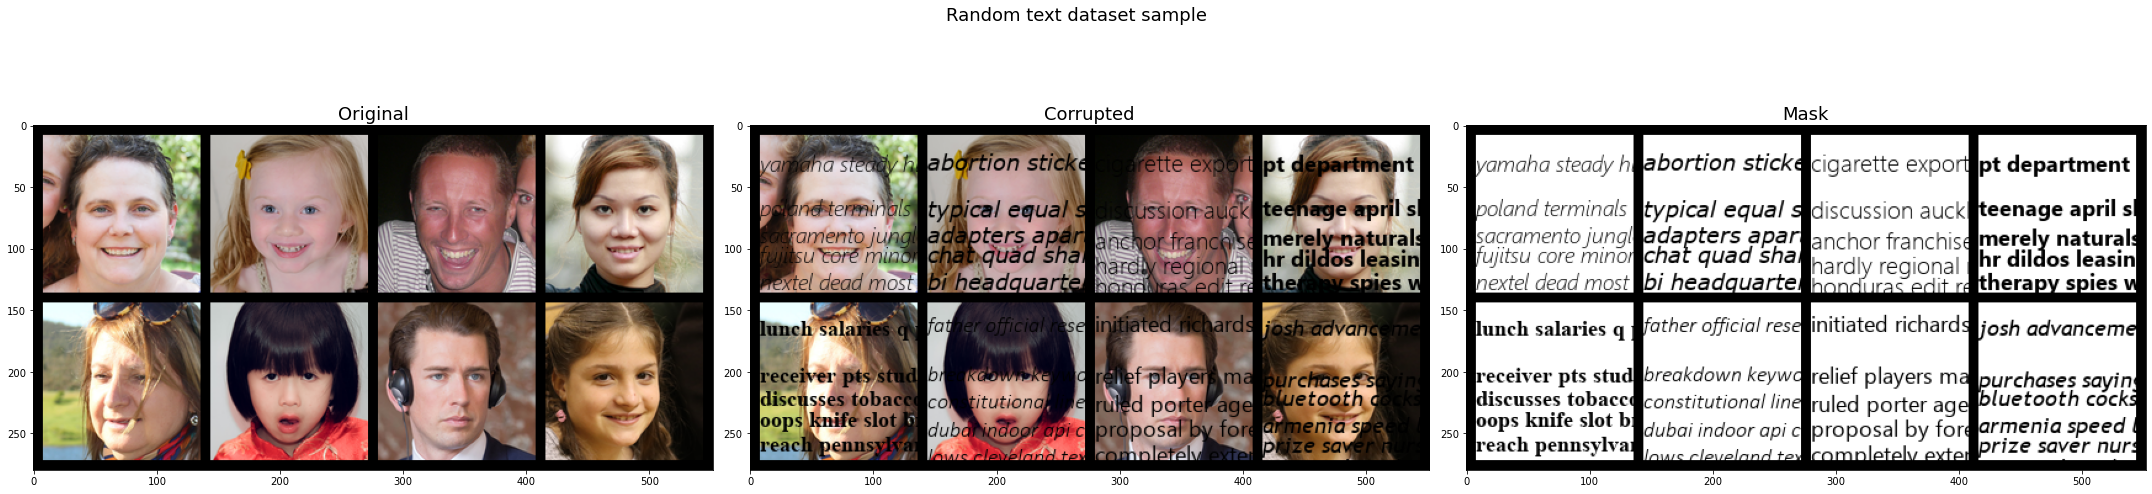

In [18]:
from dataset import ImageInpaintingDataset
from transforms import RandomText, CutOutRectangles, ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision import utils
from matplotlib import pyplot as plt

inpaintingDataset = ImageInpaintingDataset(root_dir=r'Filcker Faces thumbnails 128x128',
                                        nested=True,
                                        transform=T.Compose([RandomText(text_size=18), ToTensor()])
                                        )
dataloader = DataLoader(inpaintingDataset, batch_size=8,
                    shuffle=True, num_workers=1, persistent_workers=True)

batch = next(iter(dataloader))
original, corrupted, mask = batch['original'], batch['corrupted'], batch['mask']
original_img_grid=utils.make_grid(original, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
corrupted_img_grid=utils.make_grid(corrupted, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
mask_img_grid=utils.make_grid(mask, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)


fig, ax = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle('Random text dataset sample', fontsize=18)
ax[0].imshow(original_img_grid)
ax[0].set_title('Original', fontsize=18)
ax[1].imshow(corrupted_img_grid)
ax[1].set_title('Corrupted', fontsize=18)
ax[2].imshow(mask_img_grid)
ax[2].set_title('Mask', fontsize=18)
fig.tight_layout()

inside init of CutOutRectangles


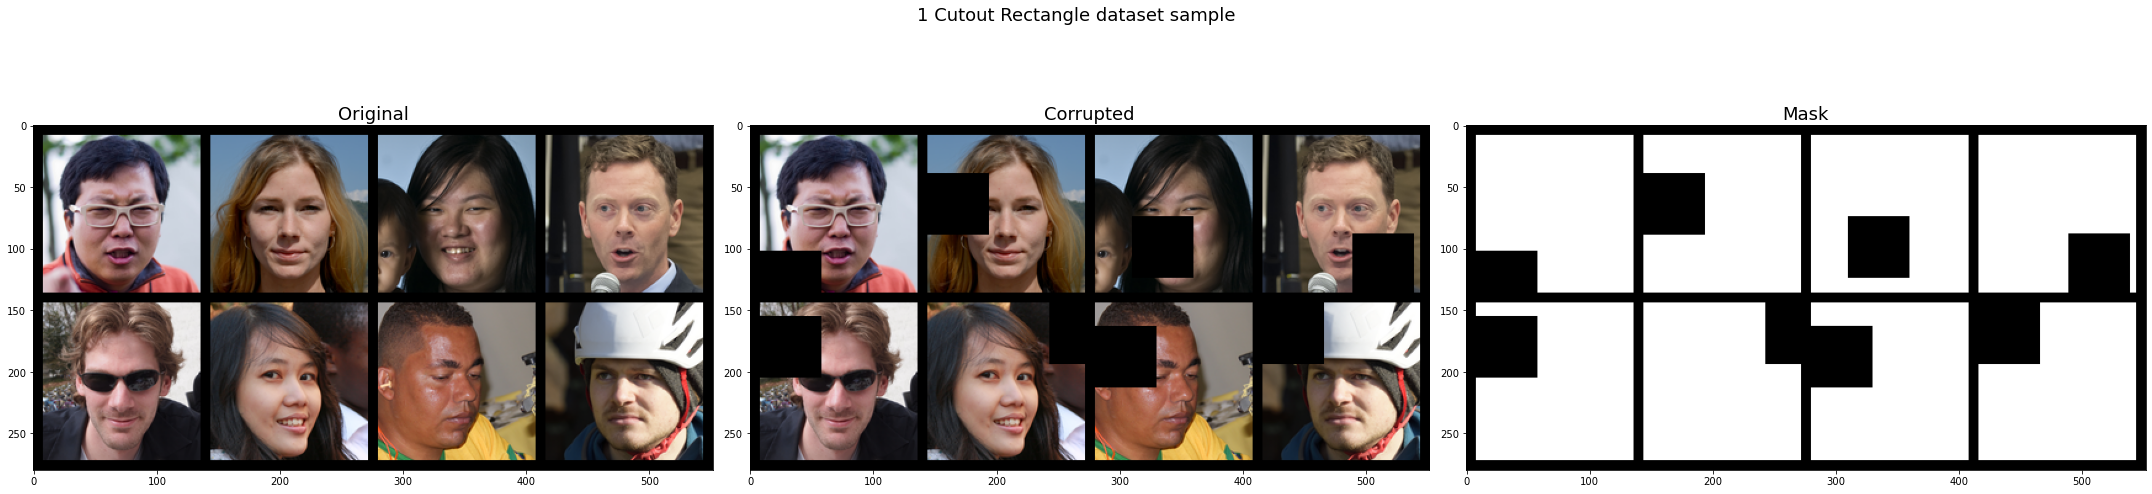

In [16]:
inpaintingDataset = ImageInpaintingDataset(root_dir=r'Filcker Faces thumbnails 128x128',
                                        nested=True,
                                        transform=T.Compose([CutOutRectangles(num_rectangles=1, max_h_size=50, max_w_size=50), ToTensor()])
                                        )
dataloader = DataLoader(inpaintingDataset, batch_size=8,
                    shuffle=True, num_workers=1, persistent_workers=True)

batch = next(iter(dataloader))

original, corrupted, mask = batch['original'], batch['corrupted'], batch['mask']
original_img_grid=utils.make_grid(original, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
corrupted_img_grid=utils.make_grid(corrupted, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
mask_img_grid=utils.make_grid(mask, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)


fig, ax = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle('1 Cutout Rectangle dataset sample', fontsize=18)
ax[0].imshow(original_img_grid)
ax[0].set_title('Original', fontsize=18)
ax[1].imshow(corrupted_img_grid)
ax[1].set_title('Corrupted', fontsize=18)
ax[2].imshow(mask_img_grid)
ax[2].set_title('Mask', fontsize=18)
fig.tight_layout()

### 3.2 Generating the synthetic corrupted Dataset:

I wrote two dataset classes, the first dataset class ```ImageInpaintingDataset``` will generate the corrupted images on the fly by specifying either ```RandomText``` or ```CutOutRectangles``` transforms. However, generating the images on the fly might take longer than loading preprocessed images which the second dataset class does. The second dataset class ```PreprocessedImageInpaintingDataset``` will read preprocessed images from the disk.

To generate the preprocessed/corrupted images, one can use the ```preprocess.py``` script using the command line. the script will generate a directory with the name of the corruption (like Fliker_RandomText_15px) under which three directories will also be created, namely *original* , *corrupted*, and *mask* each one will contain the corresponding images as the name of the folder suggests.

### 3.3 Defining the Shepard Interpolation Model

From [Equation 1](#Equation_1) we can see:
- To generate one feature map $F_i^n$ we need to convolve the input and the kernel in a channel-wise manner, that means the output of the covolution must not be one channel, it must output a number of channels equals to the input channels of the layer.
- The same kernel is used for both of the convolutions
- The division is element-wise division
- The summation to generate the final feature map is done after $J$ channel/feature wise convolutions.

So to summarize, First we have to generate ```in_channel``` outputs from applying one kernel to the input, so each channel in the kernel will be convolved with each channel in the input, then we do the same but with the mask input. The next step will be dividing the two outputs element-wise, summation over channels, applying the nonelinearity, and we get our feature map output of the current kernel.

To achieve that, we have to:
- Change the behavior of the ```Conv2D``` layer or the ```conv2d``` function to generate not only on feature map but to generate $j$ feature maps or $input\_channels$ feature maps, and this can be acheived by using the ```groups``` argument.
- We have to define the output kernels manually so we can use the $groups$ argument, because to use this argument, both the $input\_channels$ and $output\_channels$ must be divisible by $groups$.

There are two ways to define the output kernels manually:
- Define a tensor for each output kernel with the shape ```[in_channels, 1, kernel_size, kernel_size]```, and then use the function conv2d to generate the output with ```groups=input_channels```.
- Define a Conv2d layer for each output kernel with parameters ```(in_channels, in_channels, kernel_size, padding="same", groups=in_channels, bias=bias)```

We have to ensure that we convolve each input-feature-map with each kernel in a channel-wise manner to produce $J$ output feature maps (I call them intermediate feature maps), after which we can do the element wise division between them and the convolution output of the kernel with the mask, and then sum accross the channels dimension and apply a nonlinearity to get the final feature map.

In order to do this, we have to use the ```groups``` parameter in the ```F.conv2d``` function or in the ```Conv2d``` layer, depending on which way of implementing the kernels we go with.

#### 3.3.1 Shepard Interpolation layer demonstration

In [4]:
import torch
from torch import nn
from torch.nn import functional as F

class ShConv(nn.Module):
    '''
        ShConv layer
    '''

    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, bias=True, initial_weight=True, threshold = 0.01):
        '''
            in_channels: number of input channels
            out_channels: number of output channels
            kernel_size: size of the convolutional kernel
            stride: stride of the convolutional kernel
            padding: padding of the convolutional kernel
            bias: whether to use bias or not
            initial_weight: whether to initialize the weights or not
            threshold: threshold for ouputing the masks
        '''
        super(ShConv, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.threshold = threshold
        
        self.zeroing = torch.nn.Threshold(threshold, 0.0)

        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_channels))

        self.kernels = nn.ParameterList()
        for i in range(out_channels):
            self.kernels.append(nn.Parameter(torch.Tensor(in_channels, 1, kernel_size, kernel_size)))

        if initial_weight:
            self.__init_weights()

    def __init_weights(self):
        '''
            Initialize the weights of the convolutional layer
        '''
        for kernel in self.kernels:
            nn.init.kaiming_normal_(kernel)
        nn.init.constant_(self.bias, 0)
    
    def forward(self, masks, x):
        '''
            masks: the masks for the convolutional layer
            x: input tensor
        '''
        # get the device of one of the kernels
        kernel_device = self.kernels[0].device
        # defining the final output
        output_features_map = []
        output_mask = []

        # computing the output for the kernels
        for i, kernel in enumerate(self.kernels):
            # The intermediate features (they will become the final features after the element-wise division)
            intermediate_features_maps = F.conv2d(x, kernel, padding=self.padding, stride=self.stride, groups=x.size(1))
            # The intermediate masks
            intermediate_masks = F.conv2d(masks, kernel, padding=self.padding, stride=self.stride, groups=x.size(1))
            # The element-wise division
            intermediate_features_maps /= (intermediate_masks + 1e-8)
            # Computing the final featue map of this kernel
            feature_map = intermediate_features_maps.sum(dim=1, keepdim=True) + self.bias[i]
            # Computing the final mask of this kernel
            mask = intermediate_masks.sum(dim=1, keepdim=True)
            # Stacking the outputs
            output_features_map.append(feature_map)
            output_mask.append(mask)
        
        # Creating tensors of the stacked outputs
        output_features_map = torch.cat(output_features_map, dim=1)
        output_mask = torch.cat(output_mask, dim=1)

        # zeroing and thresholding
        output_mask = self.zeroing(output_mask)
        output_mask = torch.where(output_mask < 0.0, 0.0, 1.0)
        
        
        return output_features_map, output_mask


batch = 13
in_channels = 8
out_channels = 512
kernel_size = 5
stride = 1
padding = "same"
# TODO: accept both int and string for padding
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
shconv = ShConv(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
shconv.to(device)

masks = torch.randn(batch, in_channels, 32, 32)
x = torch.randn(batch, in_channels, 32, 32)
x, masks = x.to(device), masks.to(device)
output_features_map, output_mask = shconv(masks, x)
print("The parameter values and output shapes in this demonstration are:")
print(f"Batch size:                           {batch}")
print(f"Input features number is:             {in_channels}")
print(f"Output features number is:            {out_channels}")
print(f"Kernel size is:                       {kernel_size}")
print(f"The shape of the output feature maps: {output_features_map.shape}")
print(f"The shape of the output masks:        {output_mask.shape}")

The parameter values and output shapes in this demonstration are:
Batch size:                           13
Input features number is:             8
Output features number is:            512
Kernel size is:                       5
The shape of the output feature maps: torch.Size([13, 512, 32, 32])
The shape of the output masks:        torch.Size([13, 512, 32, 32])


### 3.4 The Trained Models:

I trained two models, the first one has the same architecture as the one in the paper, and the second one has more ShConv and Conv layers in it.<br>To change or add a new model, one can change the ```experiments_config``` in the ```config.py``` file.

#### 3.4.1 Training Configuration:

- I trained the mode using *1 A100 GPU* with 40 GB of memory
- The loss is calculated using the *L2 loss* namely ```nn.MSELoss()``` function
- Each model is trained for 12 epochs
- The learning rate used was ```1e-2```
- Adam optimizer is used.
- For generating the intermediate masks, I used a fixed threshold value of *0.01* for insignificant values.
- Weights of the Shepard interpolation layers are initialized using Kaiming normal initialization.
- Gradient clipping is used to prevent the gradient from exploding, clip gradients' global norm to <= 1.0.
- ReLU is used as non-linearity.

#### 3.4.2 Models' Architectures:

**base_model:**
```python
    "layers": [
        LayersHyperParameters(layer_type"shepard", kernels_num=8, kernel_size=4),
        LayersHyperParameters(layer_type"shepard", kernels_num=8, kernel_size=4),
        LayersHyperParameters(layer_type"conv", kernels_num=128, kernel_size=9),
        LayersHyperParameters(layer_type"conv", kernels_num=128, kernel_size=1),
        LayersHyperParameters(layer_type"conv", kernels_num=3, kernel_size=8),
    ]
```
- The <b>base_model</b> has the same architecture as the model used in the paper
- The first two layers are Shepard layers and the last two layers are conventional Convolutional layers.
- What was intersting to me is that they used even kernels sizes (4, 8) which I don't see used often in the current CNNs.

**small_b_3sl:**
```python
    "layers": [
        LayersHyperParameters(layer_type="shepard", kernels_num=8, kernel_size=7),
        LayersHyperParameters(layer_type="shepard", kernels_num=16, kernel_size=5),
        LayersHyperParameters(layer_type="shepard", kernels_num=32, kernel_size=5),
        LayersHyperParameters(layer_type="conv", kernels_num=64, kernel_size=5),
        LayersHyperParameters(layer_type="conv", kernels_num=128, kernel_size=3),
        LayersHyperParameters(layer_type="conv", kernels_num=128, kernel_size=3),
        LayersHyperParameters(layer_type="conv", kernels_num=3, kernel_size=3),
    ]
```
- <div class="alert alert-block alert-danger"><b>Note</b>: the name of the bigger mode ```small_b_3sl``` was misleading, but whenever I mention this model remember that it is the biggest model of the two trained models</div>
- This model has more layers than the base_line model and more kernels.
- It has three Shepard layers, after which four Conv layers are added.
- I followed the convention of starting with bigger kernel sizes and a small number of output channels at the beginning of the network, then gradually reducing the size of the kernels and increasing the number of output channels.

All the layers in the two models used padding value of *same* because out goal is to compare the output of the model with the uncorrupted image which has the same dimensions as the network input. Therefore, One had to use "same" as a padding value to preserve the spatial dimensions throug the network.

<div class="alert alert-block alert-info">I worked on building a model that has Shepard layers at the end and not the beginning of the model (hence the 'b' in the small_b_3sl) however this required reducing the spatial dimensions of the masks to match the size of the last Conv layer's output to be fed to the Shepard Conv layer. And after trying, it seemed that putting Shepard layers at the end do not contribute that much to the final result, and sometimes it made things worst.</div>

#### 3.4.3 How To Train A Model:


Training a model involves two things, first defining the model to be trained, second defining the training dataset and some hyperparameters. To organize all of that, I created a ```config.py``` file with the following content:

```python
data_set_config = {
    "splits": {
        "TEST_SPLIT": 0.05,
        "VALIDATION_SPLIT": 0.1
    },
    "extensions": ["png"],
    "paths": [
        r"./Flicker_faces_128/random_text_20px",
        r"./Flicker_faces_128/1_cutout_large_50px"
    ]
}

training_configs = {
    "epochs": 12,
    "LR": 1e-2,
    "accelerator": "gpu"
}

experiments_config = {
    "project": "ShCNN",
    "experiments": [
        {
            "name": "base_model",
            "batch_size": 250,
            "layers": [
                LayersHyperParameters("shepard", 8, 4),
                LayersHyperParameters("shepard", 8, 4),
                LayersHyperParameters("conv", 128, 9),
                LayersHyperParameters("conv", 128, 1),
                LayersHyperParameters("conv", 3, 8),
            ]
        },
    ]
}
```

To train a new model:
- Change the experiments field in the experiments_config dictionary in the config.py file.
- Each model needs a **name**, **batch_size**, and **layers** fields.
- Specify the path to the data set in the *data_set_config* dictionary in the *config.py* file.

After specifying the model, you can use the ```train.py``` script to train the model.

```bash
!python main.py --train
```

You can overwrite the number of epochs by passing the ```--epochs``` argument.

In [ ]:
!python main.py --train --epochs 12

#### 3.4.4 Training and Validation losses:

<div style="display: flex; justify-content: center;">
<div id="train_val_loss">
        <img src="images/train_loss.png" width="600"/>
</div>

<div>
    <img src="images/val_loss.png" width="600"/>
</div>
    
</div>
<div align="center">The train and validation loss of the base model on the two datasets</div>


<br>

<div style="display: flex; justify-content: center;">
<div id="train_val_loss">
        <img src="images/W&B Chart 8_11_2022, 3_14_25 PM.svg" width="600"/>
</div>

<div>
    <img src="images/W&B Chart 8_11_2022, 3_14_06 PM.svg" width="600"/>
</div>
    
</div>
<div align="center">The train and validation loss of the small_b_3sl on the two datasets</div>

<br><br>

From the second figure, a noticeable sharp increase in the loss can be seen in both the train and validation loss. I am not sure what caused this sharp increase.
<br>
When training on *random_text_20px* data set, both models continued to improve, and the best models checkpoints were saved at the final epoch, the $12_{th}$ epoch, for both of the models. Whereas when training on *1_cutout_large_50px* data set, the ```small_b_3sl``` best model was obtained at the $7_{th}$ and the best ```base_model``` model was obtained at the $6_{th}$ epoch.

#### 4.3.5 Training without clipping the gradient:

At the beginning of the training I always got similar results, empty image with brownish color. I tried different hyperparameters and nothing worked. Until I trained a network with only one shepard layer and nothing more, I checked the gradient w.r.t the weights of the layer and it was too large. My hypothesis was that the the element-wise division is generating very large values because we are dividing on very small values. To overcome this I started to clip the gradient and that worked well. Another thing I could have done is decreasing the learning rate, but I decided to keep it the same and clip the gradient instead.

In [2]:
from main import infer

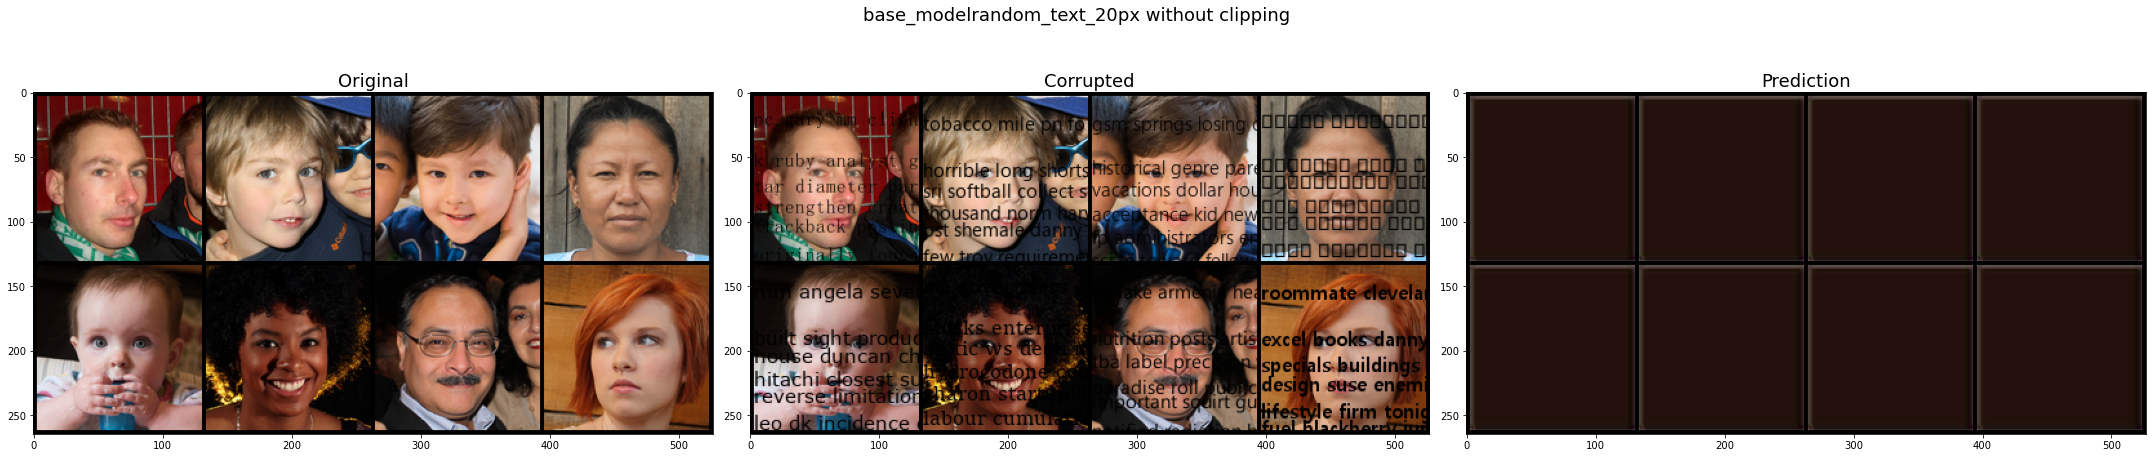

In [4]:
infer(r'.\models\base_modelrandom_text_20px without clipping\2c0xvita\checkpoints\epoch=9-step=2400.ckpt', r"C:\Users\eyad\Pictures\Images Datasets\random_text_20px", batch_size=8, padding=3)

### Testing the Model

#### Larg cutout test dataset:

C:\Users\eyad\Documents\CODE\Shepard-Convolutional-Neural-Network\ShConv.py:42: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\Convolution.cpp:883.)
  intermediate_features_maps = F.conv2d(x, kernel, padding=self.padding, stride=self.stride, groups=x.size(1))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


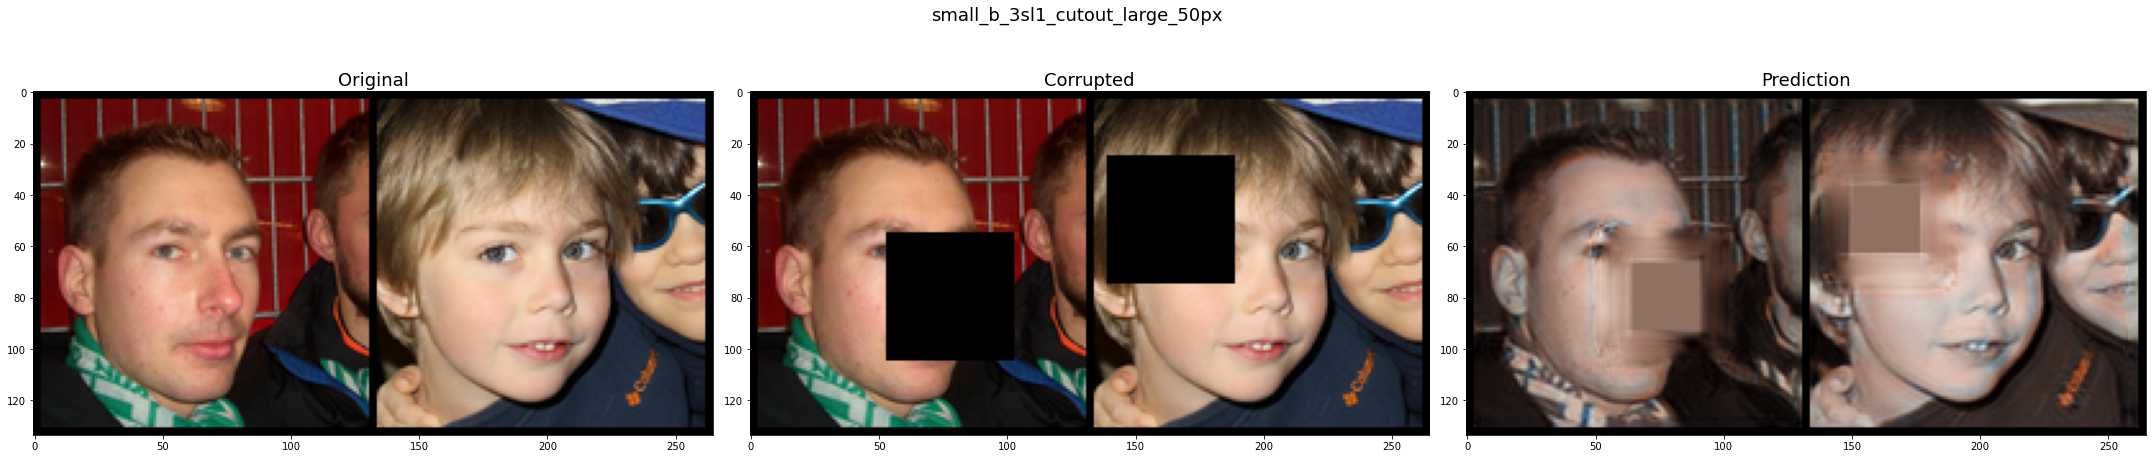

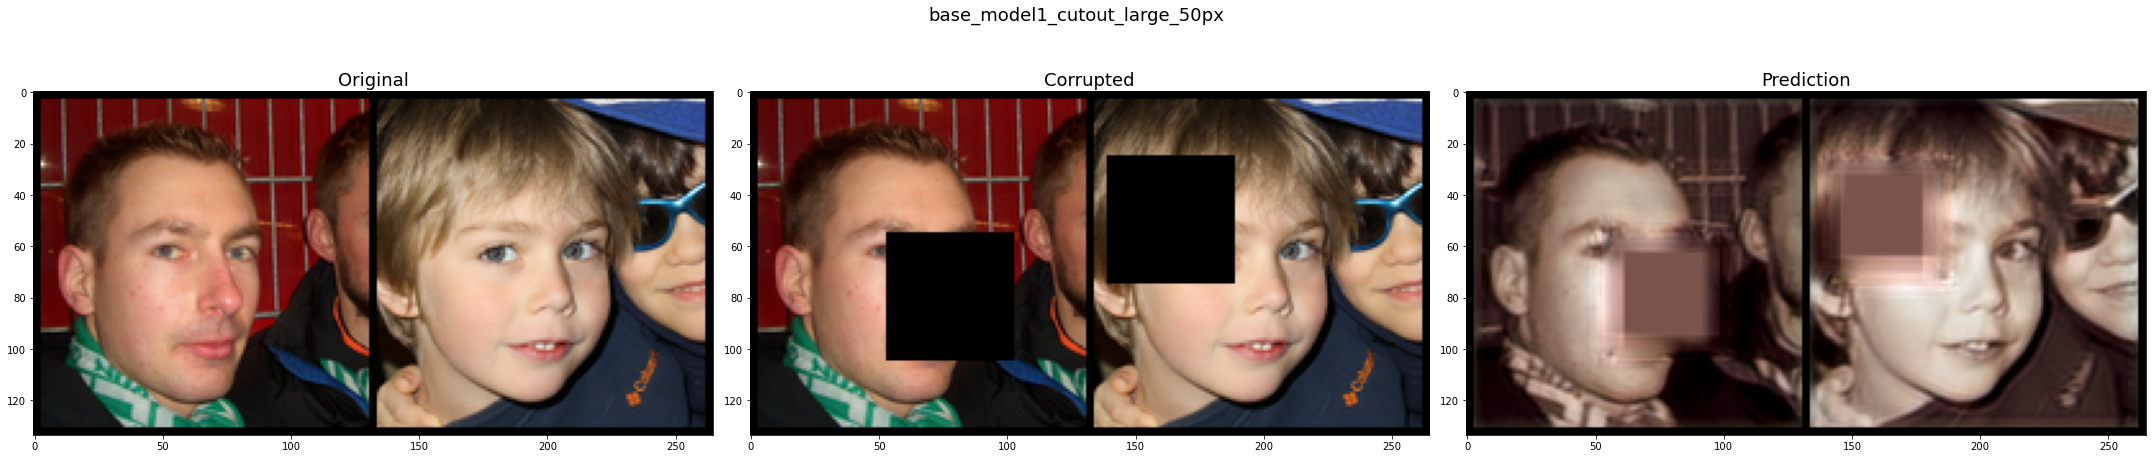

In [3]:
infer(r'.\models\small_b_3sl1_cutout_large_50px\1lwwupqs\checkpoints\epoch=7-step=3744.ckpt', r"C:\Users\eyad\Pictures\Images Datasets\1_cutout_large_50px", batch_size=2, padding=3)
infer(r'.\models\base_model1_cutout_large_50px\33rwdhqi\checkpoints\epoch=6-step=1680.ckpt', r"C:\Users\eyad\Pictures\Images Datasets\1_cutout_large_50px", batch_size=2, padding=3)

<div class="alert alert-block alert-info">First I want to note that the authors did not try the model on large cutouts, they only tried the model on text corrupted images.</div>
The top row of images represents the output of the model with more layers namely ```small_b_3sl``` model, and the bottom row of images represents the output of the model with the same architecture that is mentioned in the paper, namely ```base_model``` model.
The first thing to note is that the output images have different colors than the original images, and more precisely the ```base_model``` almost has no colors while the ```small_b_3sl``` model output has some colors. I tried my best to recover the original images' colors, but I couldn't. I tried increasing the number of layers in the model, increasing the number of kernels, and even trying MAE loss instead of MSE loss but none of them worked.<br> The only reason I can think of is the element-wise division done in the Shepard layers which may lead to a huge change in the values of the feature maps, and the solution may be in training bigger models for longer times since the bigger model here started to experience more colors.<br>
Also, with such big cutouts, clearly we can see that neither of the models did a good job inpainting the images. Nevertheless, comparing the sizes of the remaining missing-areas, one can see that the ```small_b_3sl``` model reduced it more than the ```base_model``` model, and managed to generate colors and patterns close to the surrounding known pixels.<br>Yet, this shows that Shepard Convolution Neural Network is not suitable for inpainting large missing areas. furthermore, these architectures do not have a generative capability to regenerate the missing patterns, here the facial features.

#### Text corrupted images:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


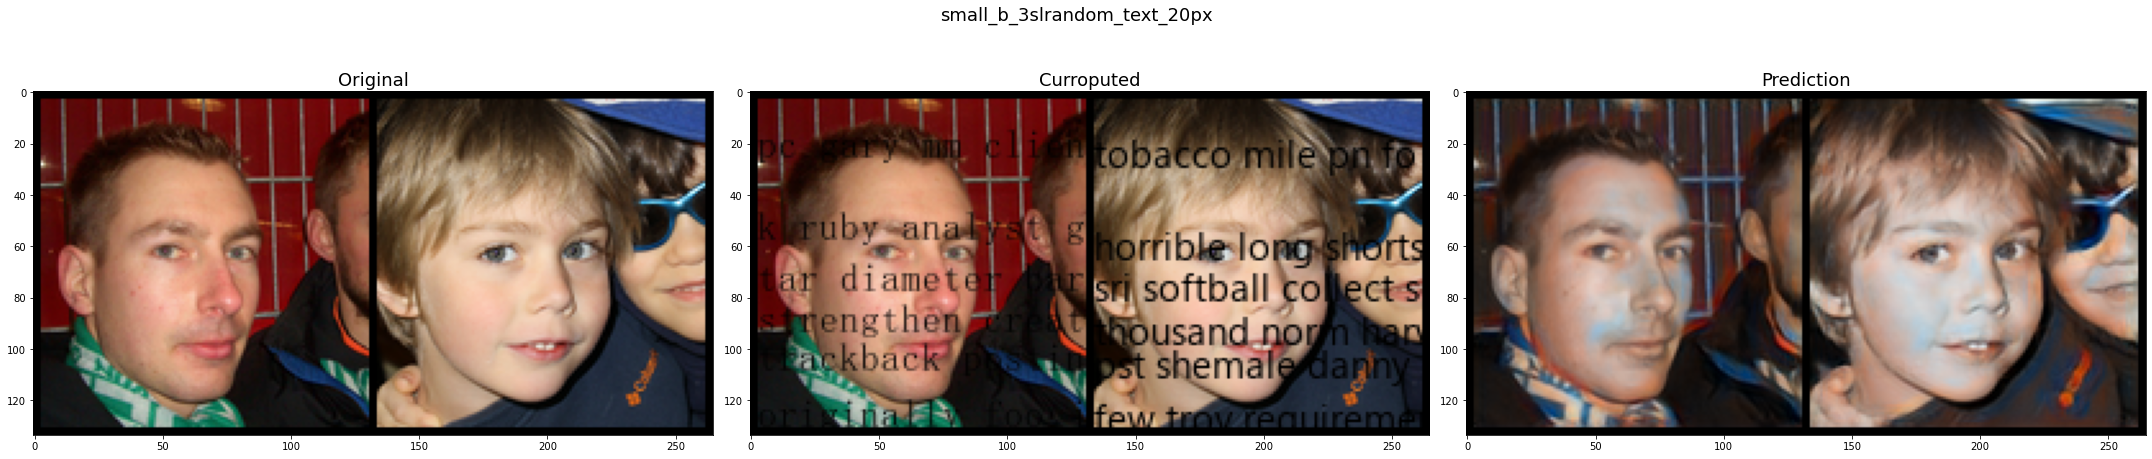

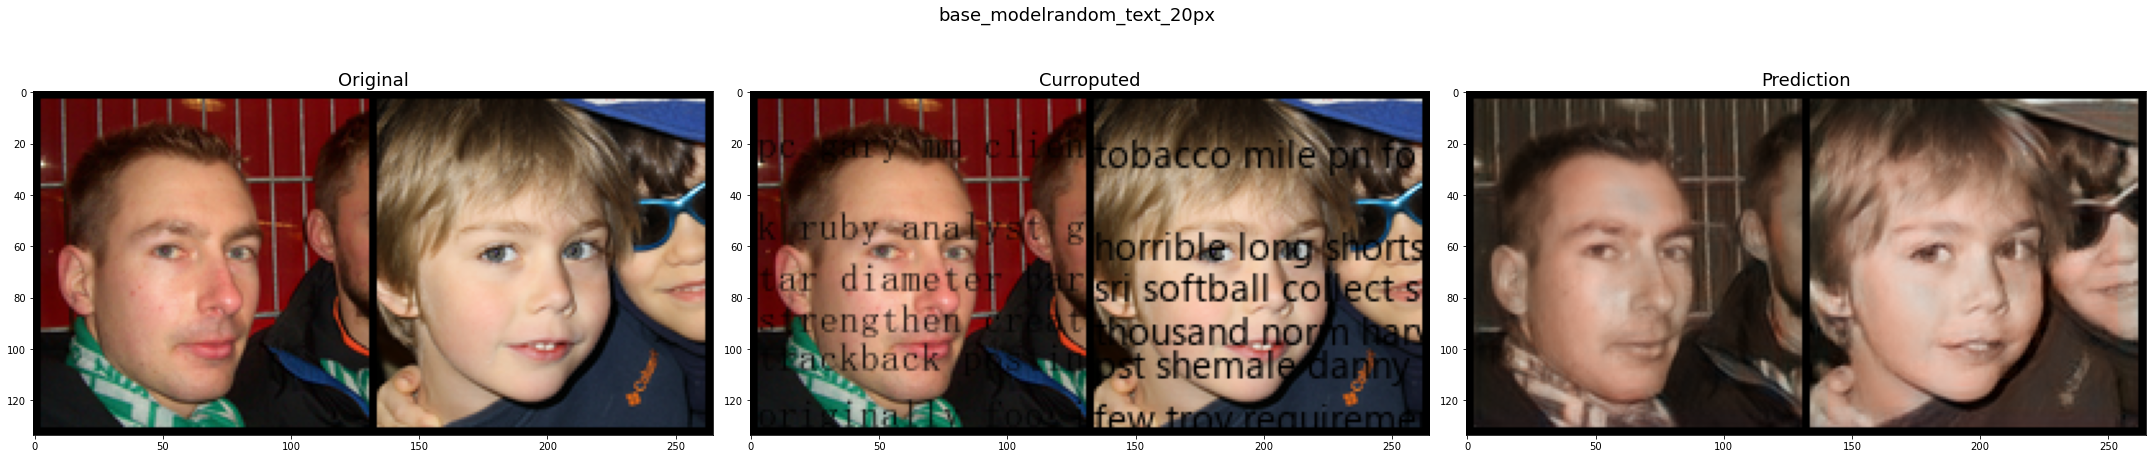

In [3]:
infer(r'.\models\small_b_3slrandom_text_20px\1xpiepna\checkpoints\epoch=11-step=5616.ckpt', r"C:\Users\eyad\Pictures\Images Datasets\random_text_20px", batch_size=2, padding=3)
infer(r'.\models\base_modelrandom_text_20px\11h4r2jp\checkpoints\epoch=11-step=2880.ckpt', r"C:\Users\eyad\Pictures\Images Datasets\random_text_20px", batch_size=2, padding=3)

The top row of images represents the output of the model with more layers namely ```small_b_3sl``` model, and the bottom row of images represents the output of the model with the same architecture that is mentioned in the paper, namely ```base_model``` model.<br>
Clearly, looking at the result on the text corrupted images, Shepard CNNs perform better with small missing areas than with large missing areas. From the results, it is noticeable that the outputs of the larger model are sharper and have more details than the smaller model, especially with the eyes of the boy where text covers a large portion of them. We can see that the larger model succeeded in restoring more details from the original image, and it also has more colors than the base model.

## Conclusions

**In conclusion, Shepard Interpolation Layers are more suitable for small missing areas. This is because they can restore small patterns or details depending on the surrounding pixels, in other words, Shepard layers can work as translation variant operators locally but not globally, and they cannot reconstruct larger patterns or details like an entire nose or eyes for example. Therefore, these layers enhance the translation variant capability of the models but their generational capability is still limited compared to GANs or other Generative models.<br>
One other advantage of Shepard layers is that they are more simple than adding 8 or more layers to acheive the same goal.**

## Bibliography

Please order alphabetically first, by publication date second.

[MMCS11] J. Masci, U. Meier, D. Ciresan, and J. Schmidhuber: Stacked convolutional auto-encoders for hierarchical fea-
ture extraction. Artificial Neural Networks and Machine Learning–ICANN 2011, pp. 52–59, 2011.

[NKD16] A. Newell, K. Yang and J. Deng: Stacked hourglass networks for human pose estimation, In B. Leibe, J. Matas, N. Sebe and M. Welling (Eds.): Computer Vision – ECCV 2016, Lecture Notes in Computer Science, Vol. 9912, 483–499, Springer, Cham, 2016

__[[PRNB+17]](http://sibgrapi.sid.inpe.br/col/sid.inpe.br/sibgrapi/2017/09.05.22.09/doc/\_2017\_sibgrapi\_\_Tutorial\_Deep\_Learning\_for\_CV\_\_\_Survey\_Paper\_CRP.pdf)__ M. A. Ponti, L. S. F. Ribeiro, T. S. Nazare, T. Bui, J. Collomoss: Everything you Wanted to Know about Deep Learning for Computer Vision but were Afraid to Ask. Sections I-III. SIBGRAPI Conference on Graphics, Patterns and Images Tutorials, October 2017.

[RFB15] Ronneberger, O., Fischer, P., Brox, T.: U-net: Convolutional networks for biomedical image segmentation. In: Navab, N., Hornegger, J., Wells, W., Frangi, A. (eds.) Medical Image Computing and Computer-Assisted Intervention – MICCAI 2015, Lecture Notes in Computer Science, vol. 9351, pp. 234–241. Springer, Cham (2015)

<div class="alert alert-block alert-danger">
  <b>Attention</b>: Some characters in links need to be escaped such as the underscores (in the admittetly horrible) URL of [PRNB+17]. 
</div>

<div class="alert alert-block alert-info">
    You can and should use <a href="https://black.readthedocs.io/en/stable/"><b>black</b></a> to follow coding standards. There is also a Jupyter Notebook version <a href="https://github.com/dnanhkhoa/nb_black"><b>nb_black</b></a>.
</div>